In [ ]:
import numpy as np
from random import random,randint
from keras.datasets import mnist
from matplotlib import pyplot as plt 
import math
import pandas as pd

from tensorflow import keras
from tensorflow.keras import layers

from PIL import Image

### XOR

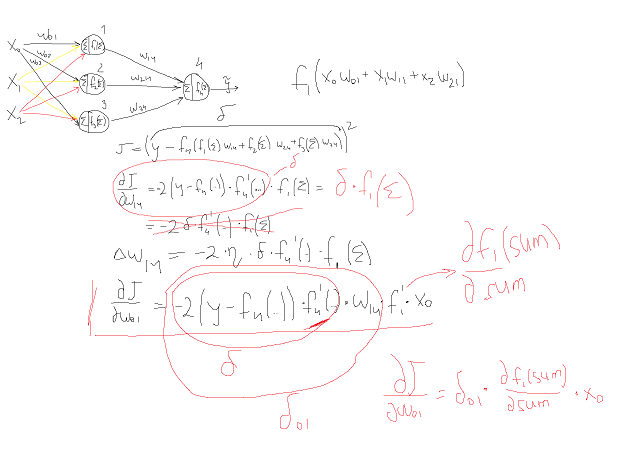

In [ ]:
class Layer:
  def __init__(self,n,m):
    self.W = np.random.rand(n,m)

  def calculate_sum(self,X_input):                    # умножаем строку из таблицы X размерностью 1x3 на вектор весов первого слоя W размерностью 3x3
    return np.dot(X_input,self.W)                     # получаем вектор сумматорной функции размерностью 1x3

                                                       # умножаем вектор 1x3 значений функций активаций нейронов первого слоя на вектор весов W2 размерностью 3x1
                                                       # получаем вектор сумматорной функции размерностью 1x1 (просто цифра)
  

  def activation_func(self,X_input):                   # пороговая функция активации для трёх нейронов первого слоя
    a = self.calculate_sum(X_input)         
    return np.where(a > 0, 1,0)                        # если значение сумматорной функции больше 0, то 1, иначе - 0
                                                       # вектор размерностью 1x3

In [ ]:
class Network:
  def __init__(self):
    self.L_hidden = Layer(3,3)
    self.L_output = Layer(3,1)


  def learning(self,X_input,y_input,learning_rate = 0.1):
    lr = learning_rate

    for _ in range(100): 
      for i in range(len(X_input)):                                             # X_input[i] это вектор [x0, x1, x2]
        # ПРЯМОЙ ПРОХОД
        input_4_out_layer = self.L_hidden.activation_func(X_input[i])         # вектор размерностью 1x3
        y_pred = self.L_output.activation_func(input_4_out_layer)             # на выходе вектор размерностью 1x1 с одним числом с индексом 0

        # ОБРАТНЫЙ ПРОХОД
        
        delta_4_out_layer = y_input[i][0] - y_pred[0]    # число                                       # производная от пороговой активационной функции по сумматорной функции равна 1
        delta_4_hid_layer = (y_input[i][0] - y_pred[0]) * self.L_output.W       # вектор 3x1           # для расчета новых весов скрытого слоя используем исходные веса выходного слоя (а не обновленные)
            
        self.L_output.W += lr*delta_4_out_layer*input_4_out_layer.reshape(3,1)
        self.L_hidden.W += lr*delta_4_hid_layer*X_input[i]                    # вектор 3x3

        # ПРЯМОЙ ПРОХОД
        input_4_out_layer = self.L_hidden.activation_func(X_input[i])         # вектор размерностью 1x3
        y_pred = self.L_output.activation_func(input_4_out_layer)             # на выходе вектор размерностью 1x1 с одним числом с индексом 0
        
    return (self.L_hidden.W, self.L_output.W)
    
  

In [ ]:
X = np.array([[0,0,1],         # Убрать из класса (подаём из вне)
              [0,1,1],
              [1,0,1],
              [1,1,1]])
    
y_target = np.array([[0],      # Убрать из класса (подаём из вне)
                     [1],
                     [1], 
                     [0]])

In [ ]:
a = Network()

In [ ]:
a.learning(X,y_target)

(array([[ 0.51232928, -0.23054428,  0.39600239],
        [-0.27468402,  0.53863525, -0.15743296],
        [ 0.45072171,  0.12122231,  0.0790283 ]]), array([[ 0.35639611],
        [-0.02897637],
        [-0.3309949 ]]))

In [ ]:
for i in range(len(X)):
  input_4_out_layer = a.L_hidden.activation_func(X[i])             # вектор размерностью 1x3
  print(a.L_output.activation_func(input_4_out_layer))             # на выходе вектор размерностью 1x1 с одним числом с индексом 0
  print()

[0]

[1]

[1]

[0]



### MNIST. Часть 1

Реализовано так:

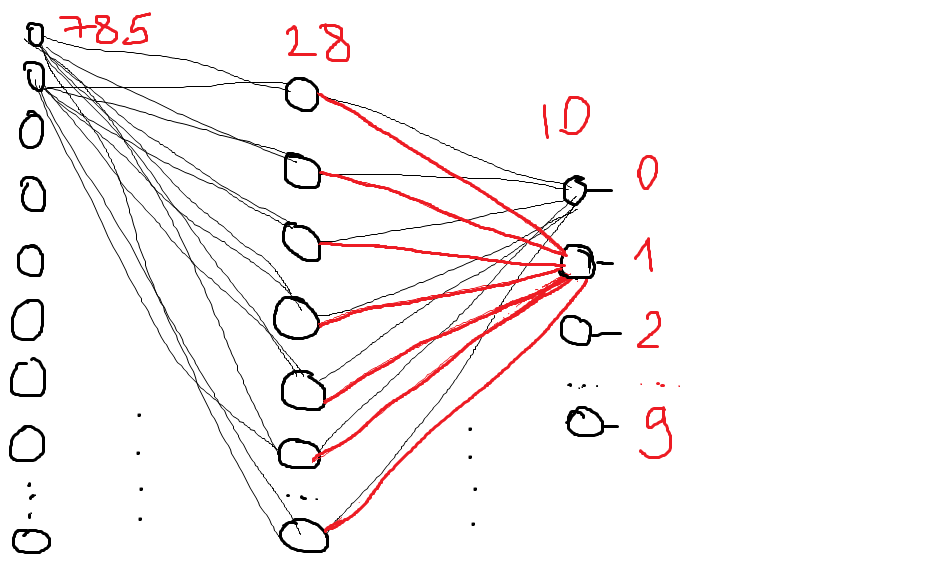

Должно быть так:
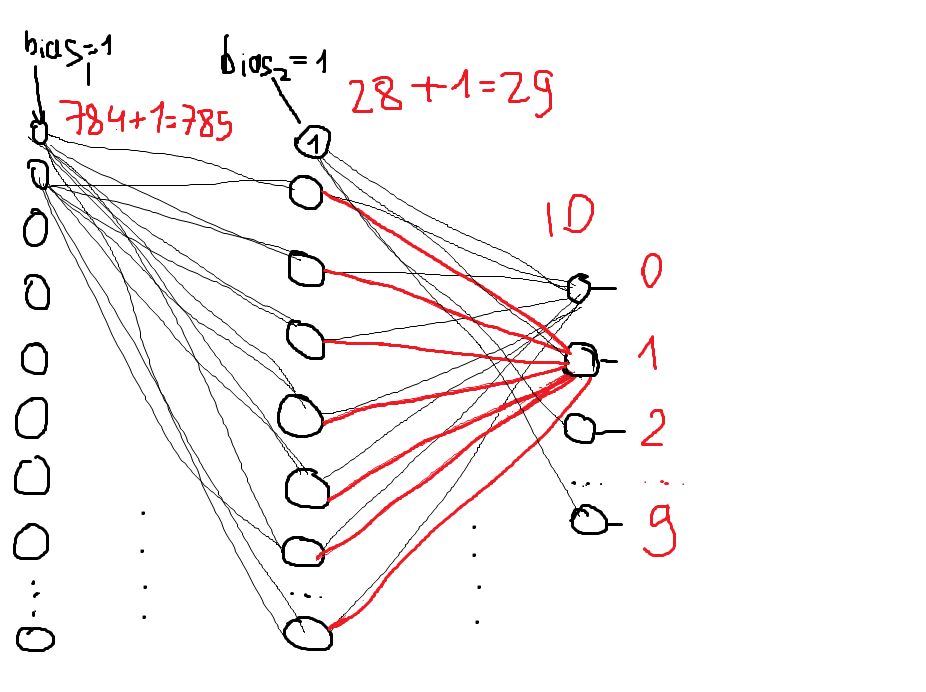

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = np.array(X_train, dtype = 'float64')
y_train = y_train

X_test = np.array(X_test, dtype = 'float64')
y_test = y_test


##### Нормализация данных. Приведем значение пикселей в диапазон от 0 до 1

X_train = X_train / 255
X_test = X_test / 255

11490434/11490434 [==============================] - 0s 0us/step


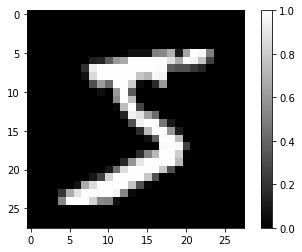

In [ ]:
plt.figure()
plt.imshow(X_train[0],cmap='gray')
plt.colorbar()

In [ ]:
class Layer:
  def __init__(self,n,m):
    # Каждый вход нейрона - пиксель картинки
    # Всего входов у нейрона 28x28 + 1 = 785
    # Всего входов 785; от каждого входа 28 весовых коэффициентов   - на скрытый слой
    # Всего 28 нейронов на скрытом слое, от каждого нейрона 10 весовых коэффициентов на выходной слой

    self.W = np.random.rand(n,m) / 1000                        # вектор размерностью (784 + 1) x 28  с учетом смещения


  def calculate_sum(self, X_input):                            # считаем взвешенную сумму
    return np.dot(X_input,self.W.T)                            # СКРЫТЫЙ СЛОЙ: умножаем вектор картинки 1x785 на транспонированный вектор весов 785x28 
                                                               # на выходе вектор взвешенных сумм скрытого слоя 1x28

  def sigmoida(self,X_input):                                  # считаем функцию активации
    sum = self.calculate_sum(X_input)                          # вектор 1x28
    sum_list = []
    for i in range(len(sum)):
      sum_i = 1 /(1 + math.exp(-sum[i]))
      sum_list.append(sum_i)
    return np.array(sum_list)                                  # СКРЫТЫЙ СЛОЙ: на выходе вектор функций активаций 1x28

  def sigmoid_derivative(self,X_input):                        # считаем производную функции активации
    sigmoida = self.sigmoida(X_input)                          # вектор 1x28
    sigmoid_derivative_list = []
    for i in range(len(sigmoida)):
      sigmoid_derivative_i = sigmoida[i]*(1 - sigmoida[i])
      sigmoid_derivative_list.append(sigmoid_derivative_i)
    return np.array(sigmoid_derivative_list)                   # СКРЫТЫЙ СЛОЙ: на выходе вектор производных функций активаций 1x28

class Network реализован не совсем верно, т.к. не учтен нейрон смещения на скрытом слое.

In [ ]:
class Network:
  # ПОЛНОСВЯЗНАЯ НЕЙРОННАЯ СЕТЬ: 2 СЛОЯ; СКРЫТЫЙ СЛОЙ - 28 НЕЙРОНОВ; ВЫХОДНОЙ СЛОЙ - 10 НЕЙРОНОВ
  # КАЖДЫЙ НЕЙРОН ВЫХОДНОГО СЛОЯ РАСПОЗНАЕТ ОДНУ ЦИФРУ ОТ 0 ДО 9
  def __init__(self):
    self.L_hidden = Layer(28,785)
    self.L_output = Layer(10,28)
    self.y_target = [0,1,2,3,4,5,6,7,8,9]                                                                          # числа, которые будем распознавать; каждый нейрон выходного слоя НС распознаёт соответствующее число


  def learning(self,X_input,y_input,learning_rate = 0.1, epochs = 1):                                              # подаём на вход функции весь датасет картинок
    lr = learning_rate
    for _ in range(epochs):
      for i in range(len(X_input)):                                                                                # X_input[i] это вектор с пикселями для одной картинки

        X = np.insert(X_input[i].flatten(),0,1)                                                                    # вектор картинки размерностью 1 x 784+1 (x0 = 1 - для смещения)

        # ПРЯМОЙ ПРОХОД
        input_4_out_layer = self.L_hidden.sigmoida(X)                                                              # вектор размерностью 1x28
        y_pred = self.L_output.sigmoida(input_4_out_layer)                                                         # на выходе вектор размерностью 1x10       
        
        for j in range(len(y_pred)):                      # перебираем каждый нейрон выходного слоя

          # y_pred - вектор с выходными сигналами НС 1x10;  y_input - вектор с лэйблами к каждой картинке; y_target - вектор с числами, которые хотим угадать

          if self.y_target[j] == y_input[i]:              # если номер нейрона выходного слоя совпадает с лейблом поданной картинки, то учим его распознавать цифру с лейбла
            # ОБРАТНЫЙ ПРОХОД
            error = 1 - y_pred[j]
            delta_4_out_layer = error*self.L_output.sigmoid_derivative(input_4_out_layer)[j]                       # ЧИСЛО (ДЕЛЬТА ДЛЯ ОДНОГО НЕЙРОНА ВЫХОДНОГО СЛОЯ); вектор дельты выходного слоя 1x10, НО нам нужна 1 дельта для 1 нейрона                    
            delta_4_hid_layer = delta_4_out_layer*self.L_output.W[j]*self.L_hidden.sigmoid_derivative(X)           # вектор дельты скрытого слоя  1x28; число*вектор(1x28)*вектор(1x28)  (поэлементное умножение)    

            self.L_output.W[j] += lr*delta_4_out_layer*input_4_out_layer                                           # МЕНЯЕМ ВЕСА ДЛЯ ОДНОГО НЕЙРОНА ВЫХ. СЛОЯ 1x28; число * число * вектор функций активаций (1x28) 
            self.L_hidden.W += lr*np.dot(delta_4_hid_layer.reshape(28,1),X.reshape(1,785))                         # МЕНЯЕМ ВСЕ ВЕСА СКРЫТОГО СЛОЯ 28x785;

          
          if self.y_target[j] != y_input[i]:
            # ОБРАТНЫЙ ПРОХОД
            error = 0 - y_pred[j] 
            delta_4_out_layer = error*self.L_output.sigmoid_derivative(input_4_out_layer)[j]                       # ЧИСЛО (ДЕЛЬТА ДЛЯ ОДНОГО НЕЙРОНА ВЫХОДНОГО СЛОЯ)                    
            delta_4_hid_layer = delta_4_out_layer*self.L_output.W[j]*self.L_hidden.sigmoid_derivative(X)           # вектор дельты скрытого слоя  1x28; число*вектор(1x28)*вектор(1x28)  (поэлементное умножение)          

            self.L_output.W[j] += lr*delta_4_out_layer*input_4_out_layer                                           # МЕНЯЕМ ВЕСА ДЛЯ ОДНОГО НЕЙРОНА ВЫХ. СЛОЯ 1x28; число * число * вектор функций активаций (1x28)
            self.L_hidden.W += lr*np.dot(delta_4_hid_layer.reshape(28,1),X.reshape(1,785))                         # МЕНЯЕМ ВСЕ ВЕСА СКРЫТОГО СЛОЯ 28x785;
        
    return ('Обучение выполнено!')
  
  def network_output(self,X_input):                                                                                # подаем весь набор картинок
    y_pred_list = []
    for i in range(len(X_input)):
      X = np.insert(X_input[i].flatten(),0,1)
      input_4_out_layer = self.L_hidden.sigmoida(X)
      y_pred = self.L_output.sigmoida(input_4_out_layer)                                                           # вектор 1x10; ВЕКТОР ВЫХОДНЫХ СИГНАЛОВ НЕЙРОСЕТИ
      y_pred_number = np.argmax(y_pred)
      y_pred_list.append(y_pred_number)
    return np.array(y_pred_list)

  def network_accuracy(self,X_input,y_input):
    counter = 0
    y_pred = self.network_output(X_input)                                                                         # список угаданных цифр

    for i in range(len(y_pred)):
      if y_pred[i] == y_input[i]:
        counter += 1

    accuracy = counter / len(y_pred) * 100                                                                        # доля верно отгаданных чисел 
    return  accuracy             


In [ ]:
a = Network()
a.learning(X_train,y_train,learning_rate = 0.1,epochs = 1)

'Обучение выполнено!'

In [ ]:
a.network_output(X_test[:100])

array([7, 2, 1, 0, 4, 1, 4, 9, 6, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6,
       6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 0, 7, 2, 7, 1, 3, 1, 1, 7, 4, 2,
       3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4,
       6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 7, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3,
       6, 1, 3, 6, 4, 3, 1, 4, 1, 7, 6, 9])

In [ ]:
y_test[:100]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6,
       6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2,
       3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4,
       6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3,
       6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9], dtype=uint8)

In [ ]:
a.network_accuracy(X_train,y_train)

92.40833333333333

In [ ]:
a.network_accuracy(X_test,y_test)

92.47

### MNIST. Часть 2. Keras

In [ ]:
# Model / data parameters
num_classes = 10             # количество цифр
input_shape = (28, 28, 1)    # размер картинки

# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255                       # нормализация
x_test = x_test.astype("float32") / 255                         # нормализация

# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

print(y_train[0])

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)  # y_train - вектор из перекодированных леблов   # число 5 будет выглядеть вот так [0,0,0,0,0,1,0,0,0,0];    число 2 будет выглядеть вот так [0,0,1,0,0,0,0,0,0,0] и т.д.
y_test = keras.utils.to_categorical(y_test, num_classes)

print(y_train[0])

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [ ]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),                                # указываем размерность входа нейросети
        layers.Flatten(),                                              # перевод в одномерный массив
        layers.Dense(28, activation="sigmoid"),                        # СКРЫТЫЙ СЛОЙ НС; в скобках (количество нейронов, функция активации)
        layers.Dense(10, activation="sigmoid"),                # ВЫХОДНОЙ СЛОЙ НС;в скобках (количество нейронов, функция активации)
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 28)                21980     
                                                                 
 dense_1 (Dense)             (None, 10)                290       
                                                                 
Total params: 22,270
Trainable params: 22,270
Non-trainable params: 0
_________________________________________________________________


In [ ]:
batch_size = 1   # количество подаваемых картинок за раз
epochs = 1

model.compile(loss="MSE", optimizer=keras.optimizers.SGD(learning_rate=0.1), metrics=["accuracy"])       # компилируем НС(?);в скобках(Функция ошибки - MSE;  алгоритм обучения - SGD (стохастический градиентный спуск); метрика оценки качества - процентная точность)
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs)      # обучаем НС

60000/60000 [==============================] - 128s 2ms/step - loss: 0.0154 - accuracy: 0.9129


In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)                      # тестируем НС
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.013256581500172615
Test accuracy: 0.9273999929428101


In [ ]:
model.predict(np.array([x_test[0]]))

1/1 [==============================] - 0s 131ms/step


array([[1.1995975e-02, 2.4859407e-03, 6.9695688e-03, 3.9846968e-02,
        2.8147870e-03, 4.3669641e-03, 3.2337973e-04, 9.4397736e-01,
        8.4336791e-03, 2.2665503e-02]], dtype=float32)

### 4 часть. Подаём свою картинку

In [ ]:
img = np.asarray(Image.open('/content/sample_data/2_pic.png')) / 255
img = img[:,:,:1]
img.shape

(28, 28, 1)

Text(0.5, 1.0, '2')

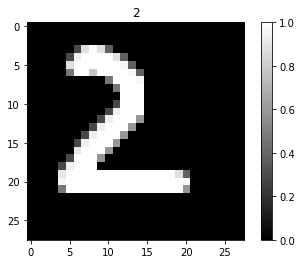

In [ ]:
plt.figure()
plt.imshow(img,cmap = 'gray')
plt.colorbar()
plt.title('2')

In [ ]:
X_2_picture = np.array([img])
a.network_output(X_2_picture)

array([2])

In [ ]:
model.predict(X_2_picture)

1/1 [==============================] - 0s 77ms/step


array([[3.8375613e-01, 1.5608061e-03, 4.6559578e-01, 2.3199977e-02,
        2.9094148e-04, 1.9060747e-01, 1.0545119e-01, 1.4873179e-04,
        1.7800879e-02, 6.3394755e-04]], dtype=float32)

In [ ]:
np.argmax(model.predict(np.array([X_2_picture])))

1/1 [==============================] - 0s 72ms/step


2